In [1]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_drinking = "D:/AI Datasets/Human Action/DATA/train/drinking"
train_eating = "D:/AI Datasets/Human Action/DATA/train/eating"
train_laughing = "D:/AI Datasets/Human Action/DATA/train/laughing"
train_sleeping = "D:/AI Datasets/Human Action/DATA/train/sleeping"

test_drinking = "D:/AI Datasets/Human Action/DATA/test/drinking"
test_eating = "D:/AI Datasets/Human Action/DATA/test/eating"
test_laughing = "D:/AI Datasets/Human Action/DATA/test/laughing"
test_sleeping = "D:/AI Datasets/Human Action/DATA/test/sleeping"


print("Number of drinking images in training set", total_files(train_drinking))
print("Number of eating images in training set", total_files(train_eating))
print("Number of laughing images in training set", total_files(train_laughing))
print("Number of sleeping images in training set", total_files(train_sleeping))

print("========================================================")

print("Number of drinking images in testing set", total_files(test_drinking))
print("Number of eating images in testing set", total_files(test_eating))
print("Number of laughing images in testing set", total_files(test_laughing))
print("Number of sleeping images in testing set", total_files(test_sleeping))

Number of drinking images in training set 1000
Number of eating images in training set 1000
Number of laughing images in training set 1000
Number of sleeping images in training set 1000
Number of drinking images in testing set 200
Number of eating images in testing set 200
Number of laughing images in testing set 200
Number of sleeping images in testing set 200


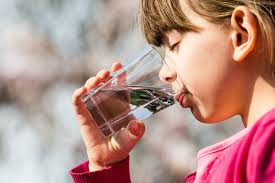

In [2]:
from PIL import Image
import IPython.display as display

image_path = "D:/AI Datasets/Human Action/DATA/train/drinking/images_122 (2).jpg"

with open(image_path, "rb") as f:
    display.display(display.Image(data=f.read(), width=500))

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('D:/AI Datasets/Human Action/DATA/train', target_size=(160, 160), batch_size=16, class_mode='categorical', shuffle=True)

test_generator = test_datagen.flow_from_directory('D:/AI Datasets/Human Action/DATA/test', target_size=(160, 160), batch_size=16, class_mode='categorical' , shuffle=False)

Found 4000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [4]:
from keras.applications import VGG19
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.metrics import Precision, Recall

vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(160, 160, 3))
for layer in vgg19_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg19_base)
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

In [5]:
model.build(input_shape=(None, 160, 160, 3))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 5, 5, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │    26,216,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         8,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,445,380 (192.43 MB)

 Trainable params: 30,420,996 (116.05 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [6]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=20
                    )

Epoch 1/20


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 205s 812ms/step - accuracy: 0.5776 - loss: 1.9883 - precision: 0.6262 - recall: 0.5074
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 201s 801ms/step - accuracy: 0.7840 - loss: 0.5747 - precision: 0.8110 - recall: 0.7277
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 198s 790ms/step - accuracy: 0.7953 - loss: 0.5195 - precision: 0.8283 - recall: 0.7609
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 199s 793ms/step - accuracy: 0.8282 - loss: 0.4455 - precision: 0.8588 - recall: 0.7928
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 197s 787ms/step - accuracy: 0.8267 - loss: 0.4487 - precision: 0.8522 - recall: 0.8001
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 198s 788ms/step - accuracy: 0.8351 - loss: 0.4125 - precision: 0.8611 - recall: 0.8106
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 201s 802ms/step - accuracy: 0.8755 - loss: 0.3618 - precision: 0.8935 - recall: 0.8458
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 200s 799ms/step - accuracy: 0.8811 - loss: 0.3319 - precision: 0.8974 - recall: 0.

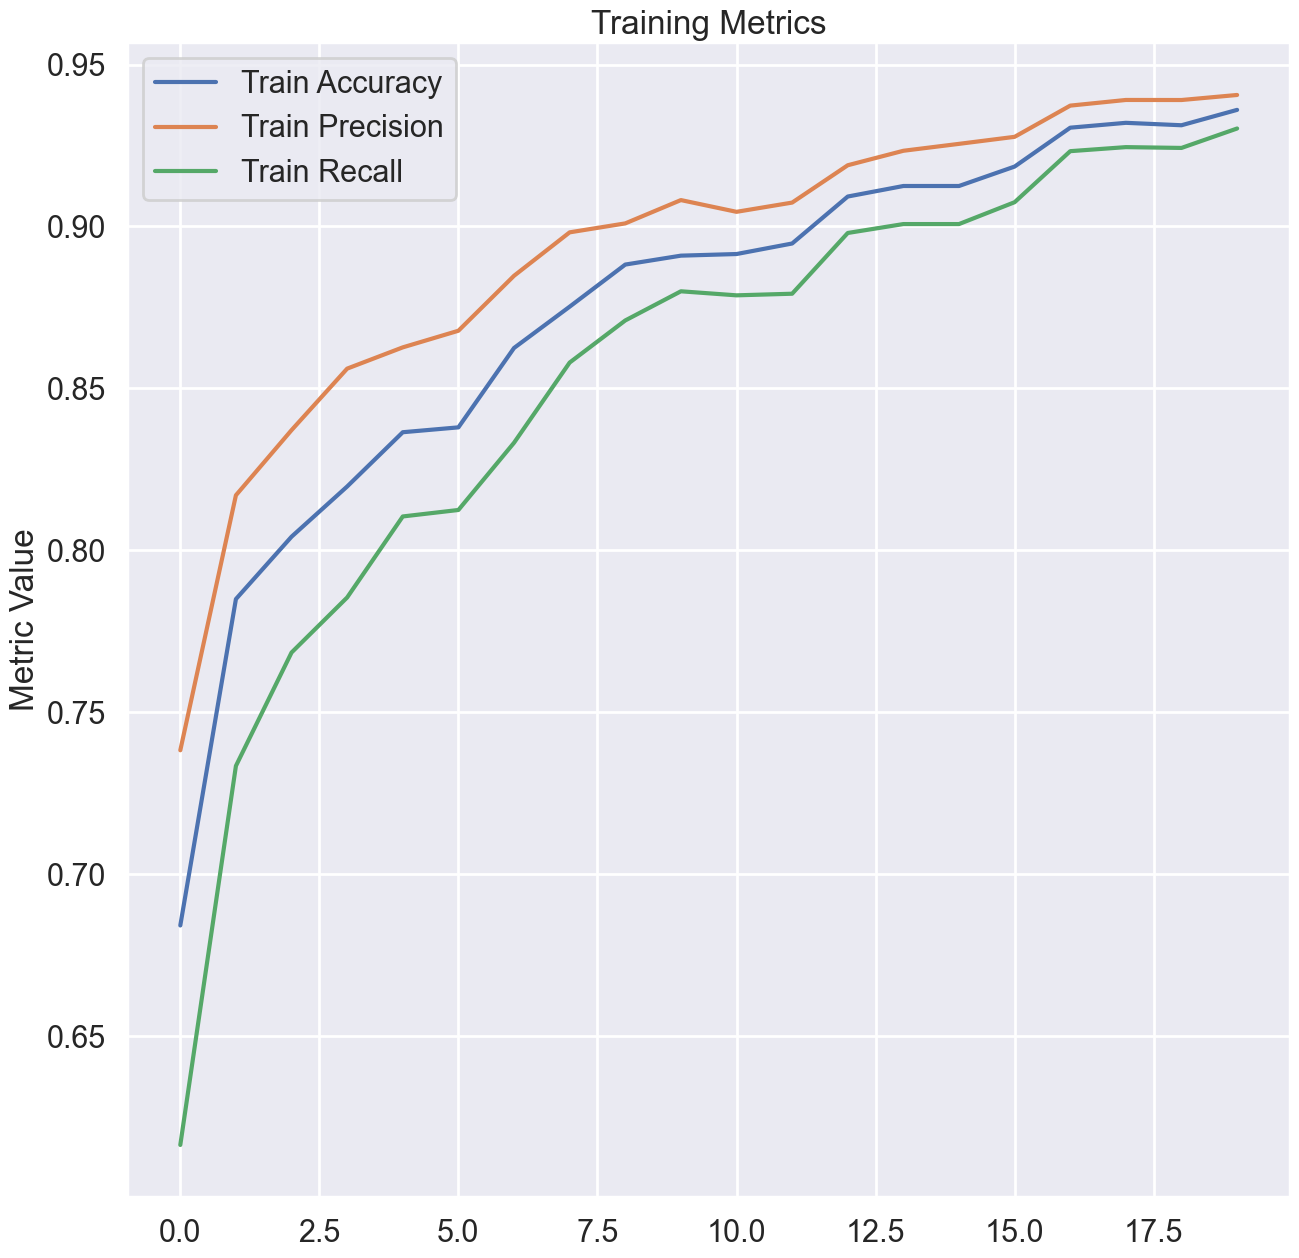

In [7]:
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

plt.figure(figsize=(15, 15))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['recall'], label='Train Recall')
plt.title('Training Metrics')
plt.ylabel('Metric Value')
plt.legend(loc='upper left')

plt.show()

In [8]:
from sklearn.metrics import classification_report

test_results = model.evaluate(test_generator)
test_predictions = model.predict(test_generator)
true_labels = test_generator.labels

report = classification_report(true_labels, test_predictions.argmax(axis=1), digits=5)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 569ms/step - accuracy: 0.7314 - loss: 0.9101 - precision: 0.7544 - recall: 0.7190
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 557ms/step


In [9]:
print(report)

              precision    recall  f1-score   support

           0    0.70312   0.67500   0.68878       200
           1    0.75847   0.89500   0.82110       200
           2    0.81928   0.68000   0.74317       200
           3    0.79126   0.81500   0.80296       200

    accuracy                        0.76625       800
   macro avg    0.76803   0.76625   0.76400       800
weighted avg    0.76803   0.76625   0.76400       800



In [12]:
model.save("vgg19_cpu.h5")

In [ ]:
model.save_weights("vgg19_cpu.weights.h5")

In [16]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
print(labels)

{0: 'drinking', 1: 'eating', 2: 'laughing', 3: 'sleeping'}


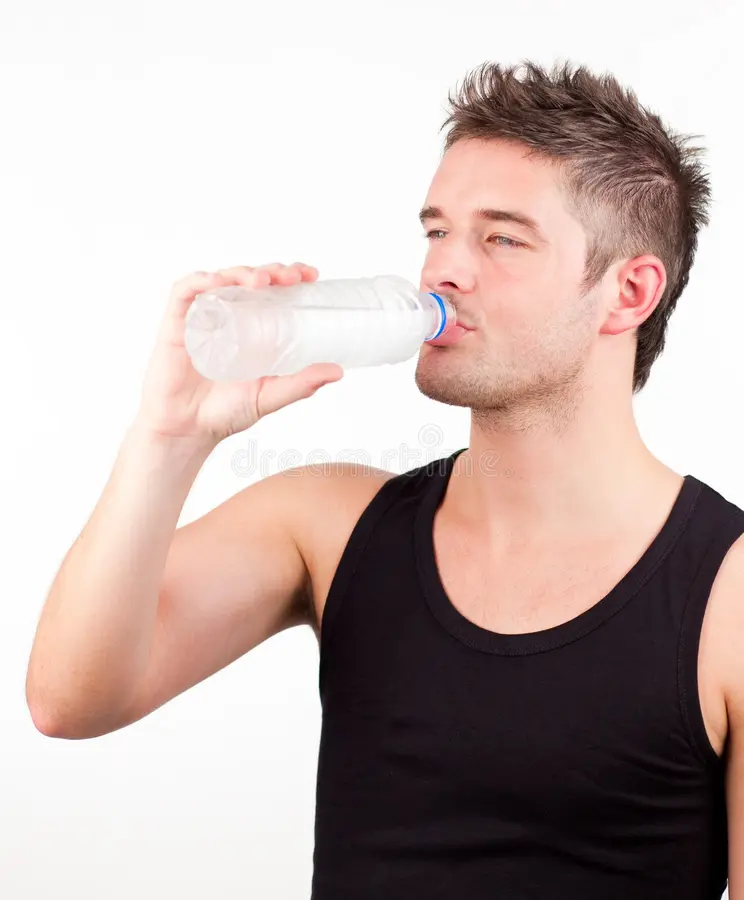

In [49]:
image_test = "D:/Downloads/man-drinking-water-10650246.webp"

with open(image_test, "rb") as f:
    display.display(display.Image(data=f.read(), width=500))

In [50]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(160, 160)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(image_test)

prediction = model.predict(x)
print(prediction)
print(f'Class: {labels[np.argmax(prediction)]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
[[9.5127916e-01 3.0200606e-06 4.8680354e-02 3.7420439e-05]]
Class: drinking


In [51]:
print(prediction[0][0])

0.95127916
